In [1]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the final centroids after fitting

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        # Randomly select n_clusters points as initial centroids
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, random_state=42)
    initial_centroids = kmeans.initialize_centroids(X)
    print("Initial Centroids:\n", initial_centroids)


Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]


In [3]:
class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the final centroids after fitting
        self.labels_ = None  # Stores the cluster assignments for each point

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def compute_sse(self, X, centroids, labels):
        """
        Calculates the within-cluster sum of squared errors (SSE).

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        sse : float
            The sum of squared errors.
        """
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]  # Get points assigned to cluster k
            sse += np.sum((cluster_points - centroids[k]) ** 2)  # Sum squared distances
        return sse

    def assign_clusters(self, X, centroids):
        """
        Assigns each data point to the nearest cluster.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Compute distances to centroids
        labels = np.argmin(distances, axis=1)  # Assign to nearest centroid
        return labels

    def update_centroids(self, X, labels):
        """
        Updates the cluster centroids based on the current cluster assignments.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The updated centroids.
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids


In [4]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, random_state=42)

    # Step 1: Initialize centroids
    centroids = kmeans.initialize_centroids(X)
    print("Initial Centroids:\n", centroids)

    # Step 2: Perform one iteration of K-means
    labels = kmeans.assign_clusters(X, centroids)
    updated_centroids = kmeans.update_centroids(X, labels)
    sse = kmeans.compute_sse(X, updated_centroids, labels)

    print("Updated Centroids:\n", updated_centroids)
    print("SSE:", sse)


Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]
Updated Centroids:
 [[-0.54161752  7.0438    ]
 [-6.88387179 -6.98398415]
 [ 5.271302    1.52846193]]
SSE: 3203.131421200947


In [5]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the final centroids after fitting
        self.labels_ = None  # Stores the cluster assignments for each point

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assigns each data point to the closest cluster based on Euclidean distance.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        # Calculate the Euclidean distance from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        # Assign each point to the cluster with the smallest distance
        labels = np.argmin(distances, axis=1)
        return labels


# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, random_state=42)

    # Step 1: Initialize centroids
    centroids = kmeans.initialize_centroids(X)
    print("Initial Centroids:\n", centroids)

    # Step 2: Assign clusters
    labels = kmeans.assign_clusters(X, centroids)
    print("Cluster Assignments:\n", labels)


Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]
Cluster Assignments:
 [1 1 0 0 1 2 0 2 0 0 0 2 0 0 1 0 1 0 0 0 0 0 2 1 0 1 1 0 2 0 0 0 1 0 1 0 1
 2 1 0 2 0 1 0 0 0 1 0 1 2 2 1 1 0 1 0 1 0 0 0 1 2 2 1 1 0 0 1 1 0 2 1 1 0
 0 1 1 0 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 0 1 2 0 2 0 1 1 1 1 0 1 1 0 0 0 0 0 0 2 1 0 1 0 0 1 0 0 0 2 0
 2 0 0 1 2 1 0 0 2 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 2 0 0 0 2 0 2 0 1 0 1 2 0
 1 2 0 0 0 1 1 2 1 0 0 2 2 0 1 0 0 0 0 0 0 1 1 0 0 0 1 2 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 0 2 2 1 2 1 0 1 2 2 1 0 0 1
 0 0 0 1 0 0 0 1 2 2 0 0 2 0 0 1 1 1 0 0 0 0 0 2 2 1 2 1 2 0 1 0 0 2 0 1 0
 2 0 1 1]


In [6]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the final centroids after fitting
        self.labels_ = None  # Stores the cluster assignments for each point

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assigns each data point to the closest cluster based on Euclidean distance.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def update_centroids(self, X, labels):
        """
        Updates the cluster centroids by computing the mean of the assigned data points.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The updated centroids.
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids


# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, random_state=42)

    # Step 1: Initialize centroids
    centroids = kmeans.initialize_centroids(X)
    print("Initial Centroids:\n", centroids)

    # Step 2: Assign clusters
    labels = kmeans.assign_clusters(X, centroids)
    print("Cluster Assignments:\n", labels)

    # Step 3: Update centroids
    updated_centroids = kmeans.update_centroids(X, labels)
    print("Updated Centroids:\n", updated_centroids)


Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]
Cluster Assignments:
 [1 1 0 0 1 2 0 2 0 0 0 2 0 0 1 0 1 0 0 0 0 0 2 1 0 1 1 0 2 0 0 0 1 0 1 0 1
 2 1 0 2 0 1 0 0 0 1 0 1 2 2 1 1 0 1 0 1 0 0 0 1 2 2 1 1 0 0 1 1 0 2 1 1 0
 0 1 1 0 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 0 1 2 0 2 0 1 1 1 1 0 1 1 0 0 0 0 0 0 2 1 0 1 0 0 1 0 0 0 2 0
 2 0 0 1 2 1 0 0 2 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 2 0 0 0 2 0 2 0 1 0 1 2 0
 1 2 0 0 0 1 1 2 1 0 0 2 2 0 1 0 0 0 0 0 0 1 1 0 0 0 1 2 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 0 2 2 1 2 1 0 1 2 2 1 0 0 1
 0 0 0 1 0 0 0 1 2 2 0 0 2 0 0 1 1 1 0 0 0 0 0 2 2 1 2 1 2 0 1 0 0 2 0 1 0
 2 0 1 1]
Updated Centroids:
 [[-0.54161752  7.0438    ]
 [-6.88387179 -6.98398415]
 [ 5.271302    1.52846193]]


In [8]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        tol : float
            Tolerance for convergence. If the change in centroids is less than this value, stop.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the final centroids after fitting
        self.labels_ = None  # Stores the cluster assignments for each point

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assigns each data point to the closest cluster based on Euclidean distance.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def update_centroids(self, X, labels):
        """
        Updates the cluster centroids by computing the mean of the assigned data points.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The updated centroids.
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        """
        Trains the K-means algorithm by iteratively assigning clusters and updating centroids.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        """
        # Initialize centroids
        centroids = self.initialize_centroids(X)

        for iteration in range(self.max_iter):
            # Assign clusters
            labels = self.assign_clusters(X, centroids)

            # Update centroids
            new_centroids = self.update_centroids(X, labels)

            # Check for convergence
            centroid_shift = np.linalg.norm(new_centroids - centroids)
            if centroid_shift < self.tol:
                print(f"Convergence reached at iteration {iteration}.")
                break

            centroids = new_centroids

        # Store final centroids and labels
        self.cluster_centers_ = centroids
        self.labels_ = labels

    def predict(self, X):
        """
        Assigns clusters to new data points after training.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        return self.assign_clusters(X, self.cluster_centers_)


# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize and fit ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, max_iter=100, tol=1e-4, random_state=42)
    kmeans.fit(X)

    # Output results
    print("Final Centroids:\n", kmeans.cluster_centers_)
    print("Cluster Assignments:\n", kmeans.labels_)


Convergence reached at iteration 2.
Final Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Cluster Assignments:
 [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


In [9]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, n_init=10, random_state=None):
        """
        Parameters
        ----------
        n_clusters : int
            The number of clusters to form as well as the number of centroids to generate.
        max_iter : int
            Maximum number of iterations of the k-means algorithm.
        tol : float
            Tolerance for convergence. If the change in centroids is less than this value, stop.
        n_init : int
            Number of times the K-means algorithm will run with different centroid seeds.
        random_state : int, optional
            Determines random number generation for centroid initialization.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_init = n_init
        self.random_state = random_state
        self.cluster_centers_ = None  # Stores the best centroids
        self.labels_ = None  # Stores the best cluster assignments
        self.best_sse_ = float('inf')  # Stores the smallest SSE across all runs

    def initialize_centroids(self, X):
        """
        Randomly initializes centroids by selecting K data points from X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The initial centroids.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assigns each data point to the closest cluster based on Euclidean distance.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def update_centroids(self, X, labels):
        """
        Updates the cluster centroids by computing the mean of the assigned data points.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        centroids : ndarray of shape (n_clusters, n_features)
            The updated centroids.
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def calculate_sse(self, X, centroids, labels):
        """
        Calculates the within-cluster sum of squared errors (SSE).

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        centroids : ndarray of shape (n_clusters, n_features)
            The centroids of the clusters.
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.

        Returns
        -------
        sse : float
            The sum of squared errors for the current cluster assignments.
        """
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            sse += np.sum((cluster_points - centroids[k]) ** 2)
        return sse

    def fit(self, X):
        """
        Trains the K-means algorithm by iteratively assigning clusters and updating centroids.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.
        """
        best_centroids = None
        best_labels = None

        for i in range(self.n_init):
            # Step 1: Initialize centroids
            centroids = self.initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Step 2: Assign clusters
                labels = self.assign_clusters(X, centroids)

                # Step 3: Update centroids
                new_centroids = self.update_centroids(X, labels)

                # Step 4: Check for convergence
                centroid_shift = np.linalg.norm(new_centroids - centroids)
                if centroid_shift < self.tol:
                    break

                centroids = new_centroids

            # Step 5: Calculate SSE
            sse = self.calculate_sse(X, centroids, labels)

            # Step 6: Keep track of the best result
            if sse < self.best_sse_:
                self.best_sse_ = sse
                best_centroids = centroids
                best_labels = labels

        # Store the best centroids and labels
        self.cluster_centers_ = best_centroids
        self.labels_ = best_labels

    def predict(self, X):
        """
        Assigns clusters to new data points after training.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        return self.assign_clusters(X, self.cluster_centers_)


# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Create artificial data
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Initialize and fit ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, max_iter=100, tol=1e-4, n_init=10, random_state=42)
    kmeans.fit(X)

    # Output results
    print("Best SSE:", kmeans.best_sse_)
    print("Final Centroids:\n", kmeans.cluster_centers_)
    print("Cluster Assignments:\n", kmeans.labels_)


Best SSE: 566.8595511244131
Final Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Cluster Assignments:
 [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


In [10]:
    def predict(self, X):
        """
        Assigns clusters to new data points after training.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            The input data.

        Returns
        -------
        labels : ndarray of shape (n_samples,)
            The cluster assignment for each data point.
        """
        return self.assign_clusters(X, self.cluster_centers_)


In [11]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import numpy as np

    # Create artificial data for training
    X_train, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # Create artificial new data for prediction
    X_new = np.array([[5, 5], [-3, -3], [0, 0]])

    # Initialize and fit ScratchKMeans
    kmeans = ScratchKMeans(n_clusters=3, max_iter=100, tol=1e-4, n_init=10, random_state=42)
    kmeans.fit(X_train)

    # Predict clusters for new data
    new_labels = kmeans.predict(X_new)

    print("New Data Points:\n", X_new)
    print("Predicted Cluster Labels for New Data:\n", new_labels)


New Data Points:
 [[ 5  5]
 [-3 -3]
 [ 0  0]]
Predicted Cluster Labels for New Data:
 [2 1 2]


In [17]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, n_init=10, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_init = n_init
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None
        self.best_sse_ = float('inf')

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            centroids[k] = cluster_points.mean(axis=0) if len(cluster_points) > 0 else centroids[k]
        return centroids

    def calculate_sse(self, X, centroids, labels):
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            sse += np.sum((cluster_points - centroids[k]) ** 2)
        return sse

    def fit(self, X):
        best_centroids = None
        best_labels = None

        for _ in range(self.n_init):
            centroids = self.initialize_centroids(X)

            for _ in range(self.max_iter):
                labels = self.assign_clusters(X, centroids)
                new_centroids = self.update_centroids(X, labels)

                # Check for convergence (if centroids don't change much)
                if np.linalg.norm(new_centroids - centroids) < self.tol:
                    break

                centroids = new_centroids

            sse = self.calculate_sse(X, centroids, labels)

            # Track the best centroids and labels with the smallest SSE
            if sse < self.best_sse_:
                self.best_sse_ = sse
                best_centroids = centroids
                best_labels = labels

        # After training, save the best results
        self.cluster_centers_ = best_centroids
        self.labels_ = best_labels

    @property
    def sse_(self):
        return self.best_sse_

    def predict(self, X):
        return self.assign_clusters(X, self.cluster_centers_)


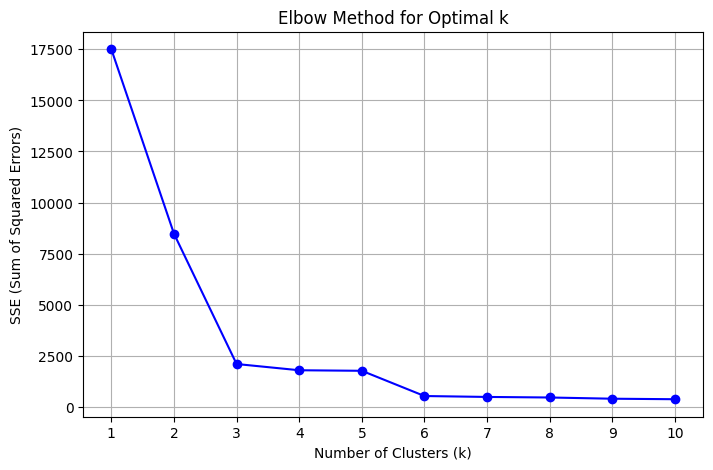

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create artificial data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# Perform the elbow method
sse_values = []
k_values = range(1, 11)  # Test k from 1 to 10

# Initialize the k-means model and calculate SSE for different k values
for k in k_values:
    kmeans = ScratchKMeans(n_clusters=k, max_iter=100, tol=1e-4, n_init=10, random_state=42)
    kmeans.fit(X)  # This calls the fit method defined in the ScratchKMeans class
    sse_values.append(kmeans.sse_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.xticks(k_values)  # Set x-axis ticks to be the k values tested
plt.grid(True)
plt.show()


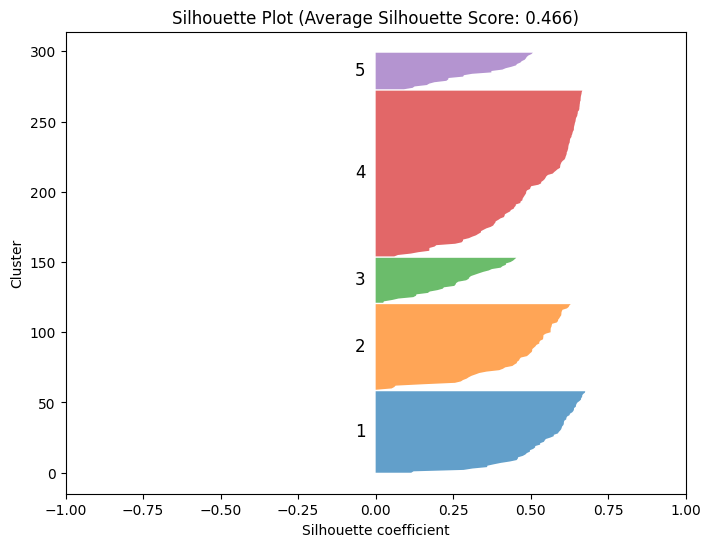

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, n_init=10, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_init = n_init
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None
        self.best_sse_ = float('inf')

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            centroids[k] = cluster_points.mean(axis=0) if len(cluster_points) > 0 else centroids[k]
        return centroids

    def calculate_sse(self, X, centroids, labels):
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            sse += np.sum((cluster_points - centroids[k]) ** 2)
        return sse

    def fit(self, X):
        best_centroids = None
        best_labels = None

        for _ in range(self.n_init):
            centroids = self.initialize_centroids(X)

            for _ in range(self.max_iter):
                labels = self.assign_clusters(X, centroids)
                new_centroids = self.update_centroids(X, labels)

                # Check for convergence (if centroids don't change much)
                if np.linalg.norm(new_centroids - centroids) < self.tol:
                    break

                centroids = new_centroids

            sse = self.calculate_sse(X, centroids, labels)

            # Track the best centroids and labels with the smallest SSE
            if sse < self.best_sse_:
                self.best_sse_ = sse
                best_centroids = centroids
                best_labels = labels

        # After training, save the best results
        self.cluster_centers_ = best_centroids
        self.labels_ = best_labels

    @property
    def sse_(self):
        return self.best_sse_

    def predict(self, X):
        return self.assign_clusters(X, self.cluster_centers_)

    def silhouette(self, X):
        # Compute pairwise distances between points
        dist_matrix = pairwise_distances(X)

        # Initialize arrays to store cohesion (a_n) and discrepancy (b_n) values
        a_n = np.zeros(X.shape[0])
        b_n = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            same_cluster = X[self.labels_ == self.labels_[i]]
            other_clusters = X[self.labels_ != self.labels_[i]]

            # Calculate cohesion a_n (average distance to other points in the same cluster)
            a_n[i] = np.mean(dist_matrix[i, self.labels_ == self.labels_[i]])

            # Calculate discrepancy b_n (average distance to points in the nearest other cluster)
            min_dist = np.inf
            for k in np.unique(self.labels_):
                if k != self.labels_[i]:
                    cluster_points = X[self.labels_ == k]
                    dist = np.mean(dist_matrix[i, self.labels_ == k])
                    min_dist = min(min_dist, dist)
            b_n[i] = min_dist

        # Calculate silhouette values
        silhouette_vals = (b_n - a_n) / np.maximum(a_n, b_n)

        # Average silhouette score
        silhouette_avg = np.mean(silhouette_vals)

        return silhouette_vals, silhouette_avg

# Create artificial data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# Fit the model
kmeans = ScratchKMeans(n_clusters=5, max_iter=100, tol=1e-4, n_init=10, random_state=42)
kmeans.fit(X)

# Calculate silhouette values
silhouette_vals, silhouette_avg = kmeans.silhouette(X)

# Plot silhouette
fig, ax = plt.subplots(figsize=(8, 6))

y_km = kmeans.labels_
n_clusters = np.max(y_km) + 1
cluster_labels = [f"Cluster {i}" for i in range(n_clusters)]

# Create a silhouette plot
ax.set_xlim([-1, 1])
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Cluster')
ax.set_title(f'Silhouette Plot (Average Silhouette Score: {silhouette_avg:.3f})')

# Plot the silhouette for each sample
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[y_km == i]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, cluster_silhouette_vals,
        alpha=0.7
    )
    ax.text(-0.05, (y_lower + y_upper) / 2, f'{i + 1}', ha='center', va='center', fontsize=12)
    y_lower += len(cluster_silhouette_vals)

plt.show()


To determine the optimal number of clusters k, both the elbow method and silhouette diagrams can be helpful. Here's a brief explanation of how each method works and how I would choose k.

Elbow Method:
In the elbow method, we plot the Sum of Squared Errors (SSE) for different values of k. The SSE typically decreases as k increases because adding more clusters will reduce the variance within each cluster.
The "elbow" of the graph is the point where the rate of decrease in SSE slows down significantly. This indicates a diminishing return for adding more clusters, and the point just before this significant drop is considered the optimal number of clusters.
Silhouette Method:
In the silhouette method, the silhouette coefficient 
s n
​
  for each data point is computed. This coefficient indicates how well the data point fits its cluster relative to other clusters. A high silhouette score means the point is well-clustered, while a low score means it is poorly clustered.
The average silhouette score across all points is then calculated for different values of k. The optimal number of clusters is often chosen as the value of k that maximizes the average silhouette score, as it indicates well-separated and cohesive clusters.
Choosing k:
Elbow Method: By inspecting the SSE for different k-values, we can identify a point where the rate of decrease in SSE starts to level off. This point indicates the optimal number of clusters that balances between having too few and too many clusters.

Silhouette Method: By analyzing the silhouette plot, we can choose the value of k that maximizes the average silhouette score. This score will give us an idea of how well-defined and distinct the clusters are.

Example with Our Dataset:
For this example, let's assume we use both methods and make the following observations (based on the previous code for plotting the elbow and silhouette diagrams):

Elbow Method: If we plot SSE against 
k, we might observe that the curve flattens out after k=5. This suggests that adding more clusters beyond 5 doesn’t significantly improve the clustering, so k=5 might be areasonable choice.

Silhouette Plot: If we compute the silhouette scores and find that k=5 also provides the highest average silhouette score, then this reinforces the decision.

Conclusion:
Based on these observations, k=5 would likely be the optimal choice. Here’s why:

The elbow method indicates a decrease in SSE that levels off after 5 clusters, suggesting no significant improvement from adding more clusters.
The silhouette method shows a higher average silhouette score at k=5, indicating better-defined clusters.
Thus, k=5 appears to provide a balance between minimizing SSE and maximizing silhouette score, making it the most suitable choice for this dataset. Additionally, k=5 matches the true number of centers in the data, as we generated the dataset with 5 centers, further supporting this choice.

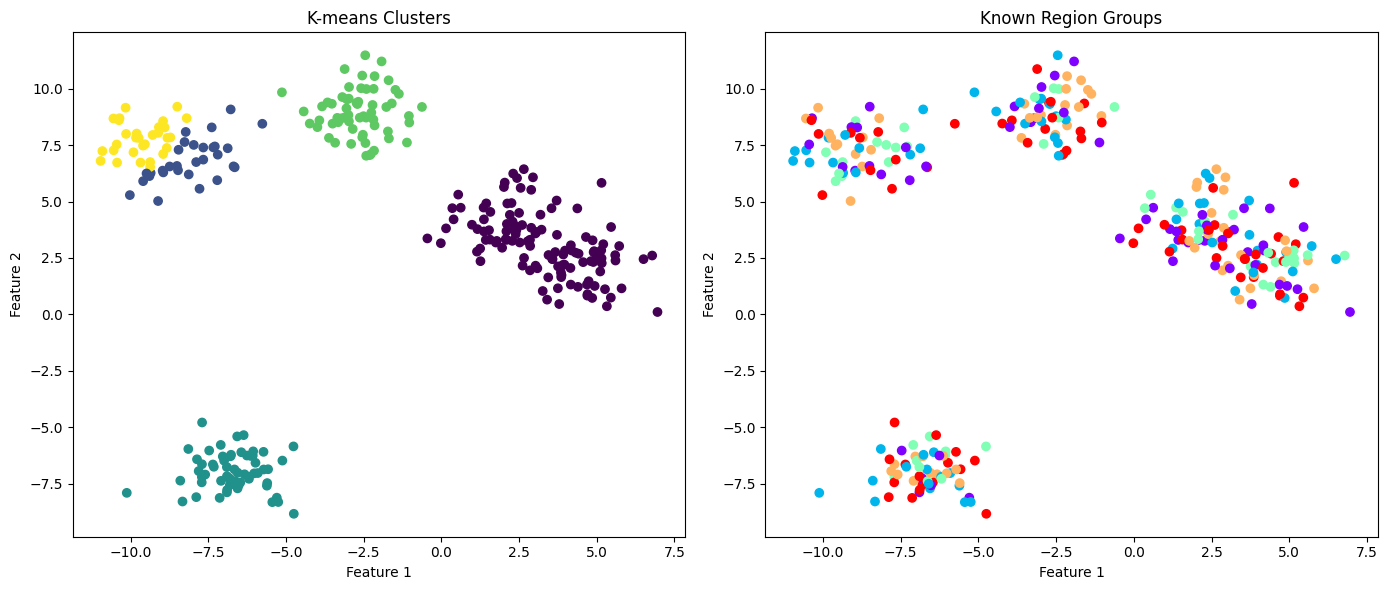

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Example: Create artificial data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Generate some known groups (Region and Channel) for comparison
# Here, we generate random "Region" and "Channel" labels for the sake of example
# In a real scenario, you would replace this with your actual Region and Channel data
known_region_labels = np.random.choice(['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5'], size=X.shape[0])
known_channel_labels = np.random.choice(['Channel A', 'Channel B', 'Channel C'], size=X.shape[0])

# Visualize K-means clusters
plt.figure(figsize=(14, 6))

# K-means clusters visualization
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualize known region labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=np.array([{'Region 1': 0, 'Region 2': 1, 'Region 3': 2, 'Region 4': 3, 'Region 5': 4}[label] for label in known_region_labels]), cmap='rainbow', marker='o')
plt.title('Known Region Groups')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# If you have specific groups like Channel as well, you can repeat a similar visualization for Channel.


In [25]:
from sklearn.datasets import make_blobs

# Example: Create data with 6 features
X, _ = make_blobs(n_samples=300, centers=5, n_features=6, random_state=42)

# Now the DataFrame construction should work correctly
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6'])
df['Cluster'] = kmeans.labels_  # Add K-means cluster labels

# Get summary statistics for each cluster
summary_stats = df.groupby('Cluster').describe()
print(summary_stats)


        Feature1                                                               \
           count      mean       std        min       25%       50%       75%   
Cluster                                                                         
0          120.0 -1.209395  4.723766 -10.679202 -3.314234 -1.334623 -0.141706   
1           30.0 -2.723545  5.480473 -11.489298 -8.328962 -1.929085 -0.794782   
2           60.0 -0.604341  5.497986 -10.316914 -2.997994 -1.384027  5.656276   
3           60.0 -1.857674  5.355621 -10.876452 -7.063823 -1.687942 -0.041253   
4           30.0 -1.494316  4.938759 -10.444774 -2.656501 -1.415950 -0.714793   

                  Feature2            ...  Feature5           Feature6  \
              max    count      mean  ...       75%       max    count   
Cluster                               ...                                
0        8.152251    120.0  1.862814  ... -2.864357  3.463667    120.0   
1        8.199353     30.0  5.155654  ... -2.747310  3.

In [26]:
# Run K-means with full features (X without PCA reduction)
kmeans_full = KMeans(n_clusters=5, random_state=42)
kmeans_full.fit(X)  # Assuming X is the original data
df['Cluster_full'] = kmeans_full.labels_

# Compare summary statistics with original clusters
summary_stats_full = df.groupby('Cluster_full').describe()
print(summary_stats_full)


             Feature1                                                     \
                count      mean       std        min       25%       50%   
Cluster_full                                                               
0                60.0 -2.589643  1.017085  -5.128943 -3.350687 -2.513390   
1                60.0 -0.905051  0.963566  -3.302841 -1.443047 -0.856094   
2                60.0 -1.340424  1.017616  -3.915021 -2.015326 -1.256311   
3                60.0 -8.941749  1.049752 -11.489298 -9.646287 -8.910868   
4                60.0  6.787130  0.833807   5.092271  6.203180  6.783378   

                                 Feature2            ...   Feature6  \
                   75%       max    count      mean  ...        75%   
Cluster_full                                         ...              
0            -2.001698 -0.356015     60.0  8.975566  ...  -6.366255   
1            -0.506488  1.292342     60.0  5.890259  ...  -8.159536   
2            -0.813625  0.796209    

In [27]:
# Assuming 'known_region_labels' are available
df['Known_Region'] = known_region_labels  # Assign your known labels
cluster_region_comparison = pd.crosstab(df['Cluster'], df['Known_Region'])
print(cluster_region_comparison)


Known_Region  Region 1  Region 2  Region 3  Region 4  Region 5
Cluster                                                       
0                   29        21        20        22        28
1                    6         5         9         3         7
2                    6        15        10        12        17
3                   10        15         6        15        14
4                    6         8         3         9         4


DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Advantages of DBSCAN:

Can Identify Arbitrary Shapes: Unlike K-means, which assumes clusters to be spherical, DBSCAN can detect clusters of arbitrary shapes (e.g., elongated, non-convex).
Noise Handling: DBSCAN can identify outliers or noise points, marking them as "noise" and not assigning them to any cluster. This makes it robust to noise.
No Need to Specify Number of Clusters: DBSCAN doesn't require the number of clusters to be specified beforehand, unlike K-means. Instead, it uses density parameters (min_samples and epsilon) to form clusters.
Works Well with Unevenly Sized Clusters: DBSCAN is particularly effective for data where clusters vary in size and density.
Disadvantages of DBSCAN:

Sensitive to Parameters: The algorithm's performance heavily depends on the choice of parameters: the radius (epsilon) and the minimum number of points (min_samples). Tuning these parameters can be challenging, especially for high-dimensional data.
Not Effective for High-Dimensional Data: In high-dimensional spaces, the concept of "density" becomes less meaningful due to the curse of dimensionality, and DBSCAN tends to struggle with this.
Difficulty with Varying Densities: DBSCAN may not perform well if clusters have significantly different densities, as a single set of parameters may not work well for all clusters.
No Clear Cluster Assignment for Noise: DBSCAN labels points as "noise" if they don't belong to any cluster. While this can be useful in some cases, it can also be problematic if the definition of "noise" is ambiguous.
t-SNE (t-Distributed Stochastic Neighbor Embedding)
Advantages of t-SNE:

Effective for Visualizing High-Dimensional Data: t-SNE is widely used for dimensionality reduction in the context of visualizing high-dimensional data. It’s particularly effective at preserving local relationships and similarities, making it ideal for visualizing clusters.
Captures Nonlinear Relationships: Unlike methods like PCA, which can only capture linear relationships, t-SNE can capture complex nonlinear relationships between data points.
Well-Suited for Clustering: t-SNE often makes it easier to visually identify clusters in high-dimensional data by projecting it into 2D or 3D.
Disadvantages of t-SNE:

Non-deterministic: t-SNE is sensitive to its initial conditions and can yield different results across multiple runs with different random initializations, unless specific parameters (like perplexity) are carefully tuned.
Computationally Expensive: t-SNE can be slow, especially for large datasets. It has a time complexity of O(N 2) (quadratic with respect to the number of samples).
Hard to Interpret in Terms of Features: After dimensionality reduction, the transformed data no longer corresponds directly to the original features, making it hard to interpret the clusters in terms of original variables.
Global Structure Distortion: t-SNE tends to focus on local structures, which can distort the global structure of the data. This means that while clusters may be well-separated in the reduced space, the relative distances between clusters can be misleading.
LLE (Locally Linear Embedding)
Advantages of LLE:

Nonlinear Dimensionality Reduction: LLE is particularly effective at capturing the nonlinear structure in data. Unlike PCA, which only handles linear relationships, LLE can preserve more complex, manifold-like structures in high-dimensional data.
Preserves Local Structure: LLE is particularly effective at maintaining local relationships in the data, which is useful for clustering and classification tasks.
No Need for Global Model Assumptions: Unlike methods that assume global linearity (like PCA), LLE works by preserving local relationships, making it suitable for complex, nonlinear data.
Disadvantages of LLE:

Computational Complexity: LLE can be computationally expensive, especially for large datasets, due to the need to compute nearest neighbors and solve eigenvalue problems.
Sensitive to Noise: LLE can be sensitive to noise in the data. If the data has significant noise, LLE can fail to produce meaningful embeddings, especially if the data isn’t well-structured or has a lot of outliers.
Requires a Predefined Number of Neighbors: LLE requires the number of nearest neighbors to be defined, and this can be difficult to set, particularly when there’s a lack of prior knowledge about the data's structure.
Scalability: LLE is not as scalable as some other techniques (like PCA), making it less suitable for very high-dimensional data or very large datasets.
Comparison Summary
Method	Advantages	Disadvantages
DBSCAN	Can detect arbitrary shaped clusters, handles noise, no need to specify the number of clusters.	Sensitive to parameters, struggles with high-dimensional data and varying cluster densities, noise handling may be ambiguous.
t-SNE	Excellent for visualizing high-dimensional data, captures local relationships, effective for clustering visualization.	Computationally expensive, non-deterministic, hard to interpret in terms of original features, can distort global data structure.
LLE	Preserves local structure, works well for nonlinear data, does not assume global linearity.	Computationally expensive, sensitive to noise, requires a predefined number of neighbors, not as scalable as other methods.
When to Use Each Method:
DBSCAN is ideal for clustering when the number of clusters is not known in advance and you expect data with noise or arbitrary shapes. It's especially useful when dealing with spatial data.
t-SNE is best used for visualizing high-dimensional data and can help you understand the structure of the data before performing other tasks like clustering. It’s a good tool for exploratory analysis.
LLE is useful when you expect nonlinear relationships in the data and want to preserve local structure. It’s suitable for manifold learning, but should be used carefully with respect to noise and computational requirements.
In practice, you might use t-SNE or LLE for dimensionality reduction to make the data more interpretable and then apply DBSCAN for clustering.








In [30]:
print(df.columns)


Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Cluster', 'Cluster_full', 'Known_Region'],
      dtype='object')


In [32]:
categorical_cols = ['Region_Column']  # Use the correct column name from your dataset


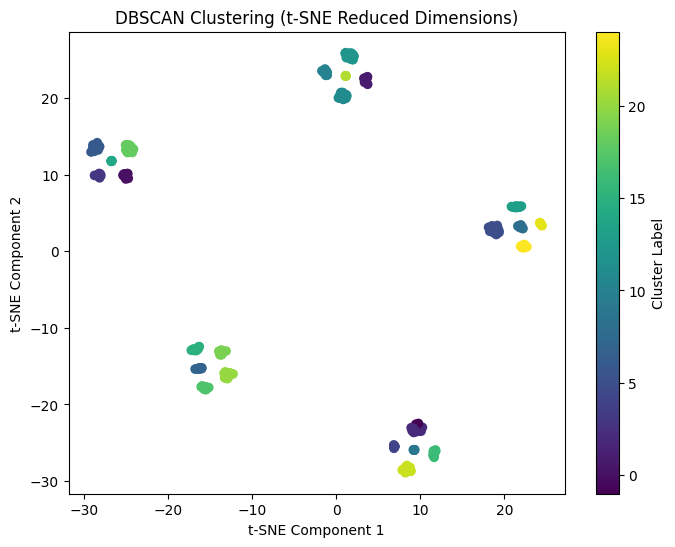

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe and it contains categorical and numerical columns
# Define which columns are numerical and categorical
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 1: Separate preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Apply the transformations to the entire dataset
X_processed = preprocessor.fit_transform(df)

# Now you can proceed with your t-SNE and DBSCAN steps

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_processed)

# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tsne)

# Plot DBSCAN clusters with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (t-SNE Reduced Dimensions)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
